In [ ]:
import numpy as np
from functools import reduce
import pandas as pd
import matplotlib.pyplot as plt

# Максимум 5 баллов - по ~0.7 баллов за задание

### 1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы. 
Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [ ]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])

In [ ]:
%%timeit 
result = 1
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if (i == j) & (X[i][j] != 0):
            result *= X[i][j]

The slowest run took 11.75 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 29.2 µs per loop


In [ ]:
%%timeit
result = reduce(lambda x, y: x*y, [X[i][j] for i in range(X.shape[0]) for j in range(X.shape[1]) if (i == j) & (X[i][j] != 0)])

10000 loops, best of 5: 29.9 µs per loop


In [ ]:
%%timeit 
result = np.prod(np.diag(X), where=np.diag(X) != 0)

The slowest run took 394.60 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 13.4 µs per loop


### 2. Дана матрица X и два вектора одинаковой длины i и j. Построить вектор nparray([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

In [ ]:
X = np.random.randint(5, size=(5,5))
i = np.random.randint(5, size=(5))
j = np.random.randint(5, size=(5))
result = np.ones(5)

In [ ]:
%%timeit
for t in range(result.size):
    result[t] = X[i[t]][j[t]]

The slowest run took 9.67 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 4.71 µs per loop


In [ ]:
%%timeit
res = np.array([X[i[t]][j[t]] for t in range(result.copy().size)])

The slowest run took 7.39 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 7.83 µs per loop


In [ ]:
%%timeit
result = X[i, j]

The slowest run took 145.06 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.18 µs per loop


### 3. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество. 
Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [ ]:
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2])

In [ ]:
%%timeit
np.array_equiv(np.unique(x), np.unique(y))

The slowest run took 11.95 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 19.8 µs per loop


In [ ]:
%%timeit
(np.isin(x, y) == np.isin(y, x)).all()

The slowest run took 5.20 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 35.5 µs per loop


In [ ]:
%%timeit
(np.unique(x) == np.unique(y)).all()

The slowest run took 6.86 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 17.3 µs per loop


### 4. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. 
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [ ]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

In [ ]:
%%timeit
result = min(x)
for i in range(x.size - 1):
    if (x[i] == 0) & (x[i + 1] > result):
        result = x[i + 1]

The slowest run took 5.43 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 7.76 µs per loop


In [ ]:
%%timeit
x_min = min(x)
result = max([x[i + 1] for i in range(x.size - 1) if (x[i] == 0) & (x[i + 1] > x_min)])

The slowest run took 4.49 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 8.25 µs per loop


In [ ]:
%%timeit
result = max(x[1:][np.where((x[:-1] == 0) & (x[:-1] < x[1:]))[0]])

The slowest run took 11.33 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 6.34 µs per loop


### 5. Дан трёхмерный массив, содержащий изображение размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

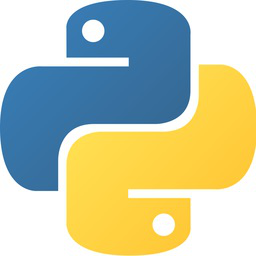

In [ ]:
import requests
from io import BytesIO
from PIL import Image
url = 'https://raw.githubusercontent.com/AndroidSaf/BMSTU_projects/main/Laboratory%20works/Numerical%20methods/python.jpg'
page = requests.get(url)
image = Image.open(BytesIO(page.content))
image

In [ ]:
im_3d_array = np.asarray(image)

In [ ]:
%%timeit
im_2d_array = np.zeros(im_3d_array.shape[:2])
for i in range(im_2d_array.shape[0]):
    for j in range(im_2d_array.shape[1]):
        im_2d_array[i, j] = sum(im_3d_array[i, j, :])

1 loop, best of 5: 277 ms per loop


In [ ]:
%%timeit
im_2d_array = im_3d_array.sum(axis=2)

1000 loops, best of 5: 1.42 ms per loop


In [ ]:
%%timeit
im_2d_array = np.sum(im_3d_array, axis=2)

1000 loops, best of 5: 1.42 ms per loop


In [ ]:
%%timeit
im_2d_array = np.dot(im_3d_array, np.ones(3))

100 loops, best of 5: 2.05 ms per loop


In [ ]:
ch_vector = np.array([0.299, 0.587, 0.114])

In [ ]:
%%timeit
new_image = Image.fromarray(np.sum(im_3d_array * ch_vector, axis=2).astype('uint8'))

100 loops, best of 5: 2.58 ms per loop


In [ ]:
%%timeit
new_image = Image.fromarray((im_3d_array * ch_vector).sum(axis=2).astype('uint8'))

100 loops, best of 5: 2.53 ms per loop


In [ ]:
%%timeit
new_image = Image.fromarray(np.dot(im_3d_array, ch_vector).astype('uint8'))

100 loops, best of 5: 2.28 ms per loop


In [ ]:
%%timeit
new_image = image.convert('L')

10000 loops, best of 5: 137 µs per loop


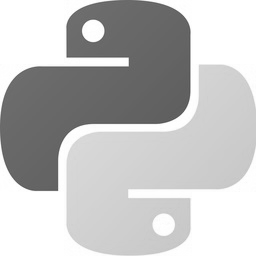

In [ ]:
image.convert('L')

### 6. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить. 
Пример: x = np.array([2, 2, 2, 3, 3, 3, 5]). Ответ: (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [ ]:
x = np.array([2, 2, 2, 3, 3, 3, 5])

In [ ]:
%%timeit
values = []
freq_values = []
for i in set(x):
    values.append(i)
    freq_values.append(x.tolist().count(i))
result = (np.array(values), np.array(freq_values))

The slowest run took 5.81 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 10.7 µs per loop


In [ ]:
%%timeit
new_x = pd.Series(x).value_counts()
result = (new_x.index, new_x.values)

The slowest run took 6.80 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 550 µs per loop


In [ ]:
%%timeit
result = np.unique(x, return_counts=True)

The slowest run took 7.56 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 19.2 µs per loop


### 7. Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравнить с функцией scipy.spatial.distance.cdist.

In [ ]:
X = ((10 - (-10)) * np.random.random((5, 2)) - 10)
Y = ((10 - (-10)) * np.random.random((5, 2)) - 10)

In [ ]:
%%timeit
dist_matrix = np.zeros((X.shape[0], Y.shape[0]))
for i, x in enumerate(X):
    for j, y in enumerate(Y): 
        dist_matrix[i][j] = np.linalg.norm(x - y)

The slowest run took 6.52 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 183 µs per loop


In [ ]:
from scipy.spatial import distance_matrix

In [ ]:
%%timeit
result = distance_matrix(X,Y)

The slowest run took 6.21 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 20.4 µs per loop


In [ ]:
from scipy.spatial import distance
X = list(zip(X[:,0], X[:,1]))
Y = list(zip(Y[:,0], Y[:,1]))

In [ ]:
%%timeit
result = distance.cdist(X, Y, "euclidean")

The slowest run took 4.54 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 29.7 µs per loop


# Вывод
Реализовав несколько решений для каждой задачи и проанализировав время выполнения каждого способа, можно сделать вывод, что реализация решения задач с приминением библиотеки NumPy намного эффективнее и проще в написании, нежели очередное "изобретение велосипеда" :)

Циклы for в питоне работают очень медленно, поэтому по возможности стоит пользоваться comprehension lists, они будут выполняться 
быстрее. Все матричные операции всегда стоит реализовывать с помощью библиотеки NumPy(она написана на С++, так что работает достаточно быстро).

##### Замечание. Можно считать, что все указанные объекты непустые (к примеру, в задаче №1 на диагонали матрицы есть ненулевые элементы).
Полезные функции NumPy: np.zeros, np.ones, np.diag, np.eye, np.arange, np.linspace, np.meshgrid,
np.random.random, np.random.randint, np.shape, np.reshape, np.transpose, np.any, np.all, np.nonzero, np.where,
np.sum, np.cumsum, np.prod, np.diff, np.min, np.max, np.minimum, np.maximum, np.argmin, np.argmax, np.unique,
np.sort, np.argsort, np.bincount, np.ravel, np.newaxis, np.dot, np.linalg.inv, np.linalg.solve.
Многие из этих функций можно использовать так: x.argmin().

# Для каждой из задач:
(a) Написать на Python + NumPy несколько вариантов кода различной эффективности. Должно быть не
менее трёх вариантов, в том числе как минимум один полностью векторизованный вариант, и один
вариант без векторизации. Третий вариант решения — на ваше усмотрение, например, это может быть
наиболее хорошо читаемый способ решения, или частично векторизованный вариант. Все варианты
решения одной задачи должны содержаться в отдельном Python модуле.

(b) Сравнить в IPython Notebook при помощи %timeit скорость работы на нескольких тестовых наборах
разного размера (минимум 3).

(c) Проанализировать полученные данные о скорости работы разных реализаций.

(d) Получить выводы.